# Titanic

#### Importing important libraries like matlotlib, seaborn, numpy and pandas.

In [1]:
#Importing Important Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

#### Importing Data

In [2]:
#Reading Data
train=pd.read_csv(r"C:\Users\asus\Desktop\CSV\train.csv")
test=pd.read_csv(r"C:\Users\asus\Desktop\CSV\test.csv")

#### Displaying part of dataset to get the idea about the type of data present

In [3]:
#Displaying a part of training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Dislaying a part of testing data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Getting Basic Information of Data

In [5]:
#Getting Basic information about training data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
#Getting Basic information about testing data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Finding Missing values

In [7]:
#Finding empty values in training data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Finding empty values in testing data
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Finding Relation between different parameters

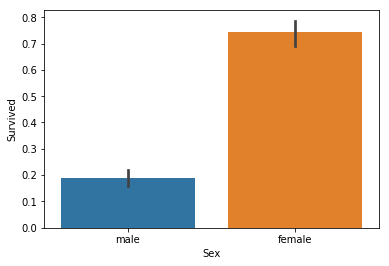

In [9]:
#Relation Between Sex and Survived
sns.barplot(x="Sex",y="Survived",data=train)

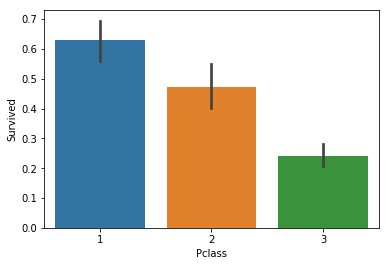

In [10]:
#Relation Between Pclass and Survived
sns.barplot(x="Pclass",y="Survived",data=train)

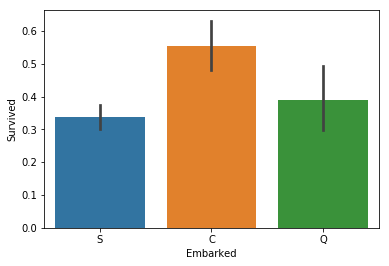

In [11]:
#Relation Between Embarked and Survived
sns.barplot(x="Embarked",y="Survived",data=train)

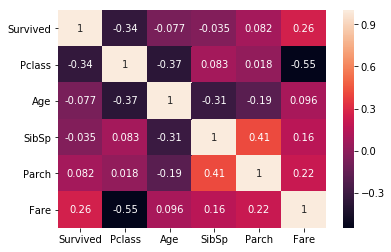

In [12]:
#Relation between all the parameters
sns.heatmap(train.drop('PassengerId',axis=1).corr(), annot=True)

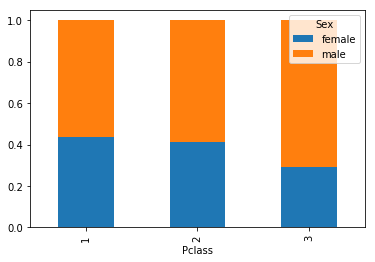

In [13]:
#Relation Between Pclass, Sex and Survival
tab=pd.crosstab(train['Pclass'],train['Sex'])
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

C:\Users\asus\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\asus\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


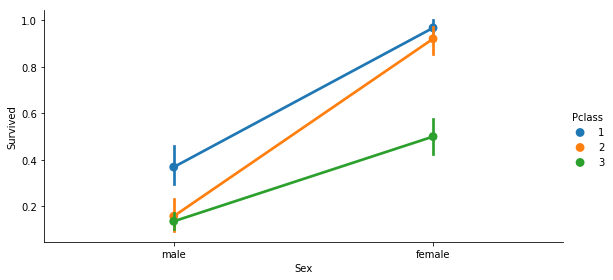

In [14]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=train)

C:\Users\asus\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


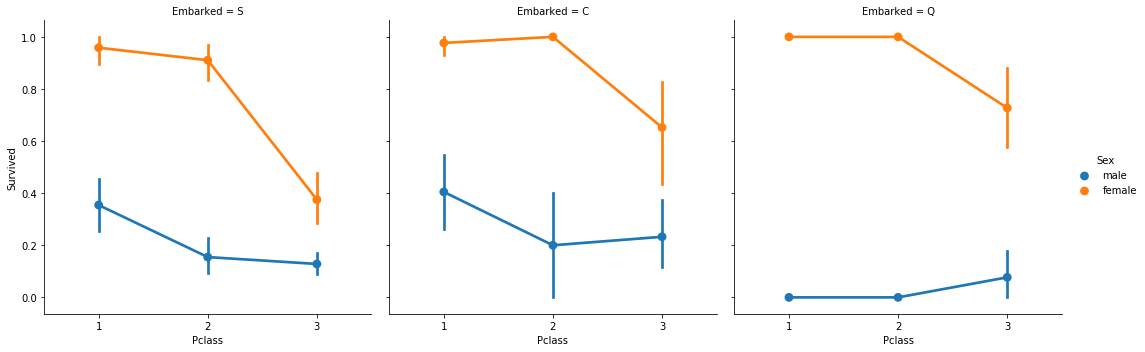

In [15]:
#Relation Between Pclass, Sex, Embarked & Survival
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train)

#### As Cabin data is misssing in mojority of the data, It means that survival does nt depend on Cabin

#### So, removing the Cabin column and adding the data to the missing columns of Age, Fare and Embarked

In [16]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
train.Age.fillna(train.Age.mean(),inplace=True) #For Age column in training data 
test.Age.fillna(test.Age.mean(),inplace=True) #for Age column in testing data
train.drop("Cabin",inplace=True,axis=1) #for removing cabin column from training
test.drop("Cabin",inplace=True,axis=1) #for removing Cabin column from testing
test.Fare.fillna(test.Fare.mean(),inplace=True) #for Fare column in testing data
train.Embarked.fillna("S",inplace=True) #for embarked column in training data as S is maximum among them so replacing NaN by S

In [18]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### As there is no direct relation of Passenger ID, Name, Ticket. So, removing these from the data.

In [20]:
train.drop(["PassengerId","Name","Ticket"],inplace=True,axis=1)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [22]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [23]:
test.drop(["PassengerId","Name","Ticket"],inplace=True,axis=1)

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 22.9+ KB


#### Converting Non-Numeric data to numeric one.

In [25]:
train.Sex=train.Sex.apply(lambda x:1 if x=="male" else 0)
test.Sex=test.Sex.apply(lambda x:1 if x=="male" else 0)
train.Embarked=train.Embarked.apply(lambda x:0 if x=="S" else (1 if x=="C" else 2) )
test.Embarked=test.Embarked.apply(lambda x:0 if x=="S" else (1 if x=="C" else 2))
test.Age=test.Age.apply(lambda x:0 if x<=16 else (1 if x<=32 else (2 if x<=48 else (3 if x<=48 else 4))))
train.Age=train.Age.apply(lambda x:0 if x<=16 else (1 if x<=32 else (2 if x<=48 else (3 if x<=48 else 4))))

#### Creating Variables for training Purpose

In [26]:
x_train=train.drop("Survived",axis=1)
y_train=train["Survived"]
x_test=test

In [27]:
y_test=pd.read_csv(r"C:\Users\asus\Desktop\CSV\gender_submission.csv")

In [28]:
y_test=y_test.Survived

## Creating Models

#### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression #importing library
regressor=LogisticRegression() #Storing the algorithm in a variable
regressor.fit(x_train,y_train) #training model
y_pred=regressor.predict(x_test) #predicting testing data
y_pred=list(y_pred) #Conversion into list for further processing
print("Number of people Survived={}\nNumber of people not Survive={}".format(y_pred.count(1),y_pred.count(0))) #printing result
print("Accuracy={}".format(regressor.score(x_test,y_test)))

Number of people Survived=155
Number of people not Survive=263
Accuracy=0.9545454545454546


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB #importing library
gnb=GaussianNB() #Storing the algorithm in a variable
gnb.fit(x_train,y_train) #training model
y_pred=gnb.predict(x_test) #predicting testing data
y_pred=list(y_pred) #Conversion into list for further processing
print("Number of people Survived={}\nNumber of people not Survive={}".format(y_pred.count(1),y_pred.count(0))) #printing result
print("Accuracy={}".format(gnb.score(x_test,y_test)))

Number of people Survived=173
Number of people not Survive=245
Accuracy=0.9258373205741627


#### Descision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier #importing library
clf=DecisionTreeClassifier().fit(x_train,y_train) #training model
y_pred=clf.predict(x_test) #predicting testing data
y_pred=list(y_pred) #Conversion into list for further processing
print("Number of people Survived={}\nNumber of people not Survive={}".format(y_pred.count(1),y_pred.count(0))) #printing result
print("Accuracy={}".format(clf.score(x_test,y_test)))

Number of people Survived=157
Number of people not Survive=261
Accuracy=0.8301435406698564


#### Vector Machine Classifier

In [32]:
from sklearn.svm import SVC #importing library
svm=SVC() #Storing the algorithm in a variable
svm.fit(x_train,y_train) #training model
y_pred=svm.predict(x_test) #predicting testing data
y_pred=list(y_pred) #Conversion into list for further processing
print("Number of people Survived={}\nNumber of people not Survive={}".format(y_pred.count(1),y_pred.count(0))) #printing result
print("Accuracy={}".format(svm.score(x_test,y_test)))

Number of people Survived=162
Number of people not Survive=256
Accuracy=0.8373205741626795


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier #importing library
knn=KNeighborsClassifier() #Storing the algorithm in a variable
knn.fit(x_train,y_train) #training model
y_pred=knn.predict(x_test) #predicting testing data
y_pred=list(y_pred) #Conversion into list for further processing
print("Number of people Survived={}\nNumber of people not Survive={}".format(y_pred.count(1),y_pred.count(0))) #printing result
print("Accuracy={}".format(knn.score(x_test,y_test)))

Number of people Survived=162
Number of people not Survive=256
Accuracy=0.7751196172248804
